# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities)

Number of cities in the list: 609
['papatowai', 'yellowknife', 'bethel', 'albany', 'stanley', 'bikenibeu village', 'adamstown', 'jiuquan', 'tateyama', 'puerto ayora', 'adrar', 'howard springs', 'edinburgh of the seven seas', 'talnakh', 'kapuskasing', 'iskateley', 'blackmans bay', 'wailua homesteads', 'hawaiian paradise park', 'brisas de zicatela', "arkhangel'sk", 'pskov', 'naraini', 'vilyuchinsk', 'vila velha', 'qaqortoq', 'saurimo', 'bilibino', 'grytviken', 'leava', 'iqaluit', 'dudinka', 'margaret river', 'severo-yeniseyskiy', 'waitangi', 'anadyr', 'east london', 'vorgashor', 'hermanus', 'punta arenas', 'xilin hot', 'sao joao da barra', 'kavaratti', 'port-aux-francais', 'lobujya', 'minot air force base', 'avarua', 'minab', 'port lincoln', 'zouerate', 'wakkanai', 'turtas', 'bredasdorp', 'praia da vitoria', "kapa'a", 'kodiak', 'novaya igirma', 'cole harbour', 'ancud', 'charleston', 'wellawaya', 'aasiaat', 'wagar', 'tangalle', 'masterton', 'tiksi', 'puerto baquerizo moreno', 'christchurc

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather  = requests.get(city_url + city).json()
    

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather['coord']['lat'])
        city_lng = (city_weather['coord']['lon'])
        city_max_temp = (city_weather['main']['temp_max'])
        city_humidity = (city_weather['main']['humidity'])
        city_clouds = (city_weather['clouds']['all'])
        city_wind = (city_weather['wind']['speed'])
        city_country = (city_weather['sys']['country'])
        city_date = (city_weather['sys']['sunrise'])
#         

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | bikenibeu village
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | jiuquan
Processing Record 9 of Set 1 | tateyama
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | adrar
Processing Record 12 of Set 1 | howard springs
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | kapuskasing
Processing Record 16 of Set 1 | iskateley
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | brisas de zicatela
Processing Record 21 of Set 1 | arkhangel'sk
Processin

Processing Record 37 of Set 4 | usogorsk
Processing Record 38 of Set 4 | minas de marcona
Processing Record 39 of Set 4 | antofagasta
Processing Record 40 of Set 4 | college
Processing Record 41 of Set 4 | namsos
Processing Record 42 of Set 4 | kill devil hills
Processing Record 43 of Set 4 | san andres
Processing Record 44 of Set 4 | labytnangi
Processing Record 45 of Set 4 | nadi
Processing Record 46 of Set 4 | el bauga
Processing Record 47 of Set 4 | qamdo
Processing Record 48 of Set 4 | souillac
Processing Record 49 of Set 4 | aberdeen
Processing Record 0 of Set 5 | whitehorse
Processing Record 1 of Set 5 | taro
Processing Record 2 of Set 5 | happy valley-goose bay
Processing Record 3 of Set 5 | lebu
Processing Record 4 of Set 5 | viedma
Processing Record 5 of Set 5 | tsuruoka
Processing Record 6 of Set 5 | villa alberto andres alvarado aramburo
City not found. Skipping...
Processing Record 7 of Set 5 | bay city
Processing Record 8 of Set 5 | balqash
Processing Record 9 of Set 5 | 

Processing Record 30 of Set 8 | zintan
Processing Record 31 of Set 8 | zholymbet
Processing Record 32 of Set 8 | lucapa
Processing Record 33 of Set 8 | haymana
Processing Record 34 of Set 8 | geraldton
Processing Record 35 of Set 8 | sinjai
Processing Record 36 of Set 8 | magway
Processing Record 37 of Set 8 | callao
Processing Record 38 of Set 8 | sitka
Processing Record 39 of Set 8 | cooma
Processing Record 40 of Set 8 | mount gambier
Processing Record 41 of Set 8 | mapastepec
Processing Record 42 of Set 8 | suva
Processing Record 43 of Set 8 | lavrio
Processing Record 44 of Set 8 | carupano
Processing Record 45 of Set 8 | bhamo
Processing Record 46 of Set 8 | nurabad
Processing Record 47 of Set 8 | aldinga beach
Processing Record 48 of Set 8 | sergeyevka
Processing Record 49 of Set 8 | chernomorskoye
Processing Record 0 of Set 9 | hovd
Processing Record 1 of Set 9 | cannonvale
Processing Record 2 of Set 9 | pyhajarvi
Processing Record 3 of Set 9 | ambodifotatra
Processing Record 4 o

Processing Record 19 of Set 12 | mirador
Processing Record 20 of Set 12 | south hedland
Processing Record 21 of Set 12 | mendaha
Processing Record 22 of Set 12 | arica
Processing Record 23 of Set 12 | kerikeri
Processing Record 24 of Set 12 | afragola
Processing Record 25 of Set 12 | san julian
Processing Record 26 of Set 12 | fortaleza
Processing Record 27 of Set 12 | sidi khaled
Processing Record 28 of Set 12 | dossor
Processing Record 29 of Set 12 | muisne
Processing Record 30 of Set 12 | kourou
Processing Record 31 of Set 12 | dickinson
Processing Record 32 of Set 12 | amboanjo
Processing Record 33 of Set 12 | odda
Processing Record 34 of Set 12 | ta`u
Processing Record 35 of Set 12 | rongelap
Processing Record 36 of Set 12 | tranovaho
City not found. Skipping...
Processing Record 37 of Set 12 | caleta de carquin
Processing Record 38 of Set 12 | yilan
Processing Record 39 of Set 12 | xinqing
Processing Record 40 of Set 12 | nanao
Processing Record 41 of Set 12 | xuchang
Processing 

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,11.15,90,100,4.35,NZ,1683834787
1,yellowknife,62.4560,-114.3525,20.29,26,75,6.69,CA,1683802270
2,bethel,41.3712,-73.4140,22.05,46,0,0.00,US,1683797957
3,albany,42.6001,-73.9662,22.36,51,40,3.73,US,1683797903
4,stanley,54.8680,-1.6985,9.84,93,40,2.06,GB,1683864352


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,11.15,90,100,4.35,NZ,1683834787
1,yellowknife,62.4560,-114.3525,20.29,26,75,6.69,CA,1683802270
2,bethel,41.3712,-73.4140,22.05,46,0,0.00,US,1683797957
3,albany,42.6001,-73.9662,22.36,51,40,3.73,US,1683797903
4,stanley,54.8680,-1.6985,9.84,93,40,2.06,GB,1683864352


# Create the Scatter Plots Requested

#### Latitude Vs. Temperature

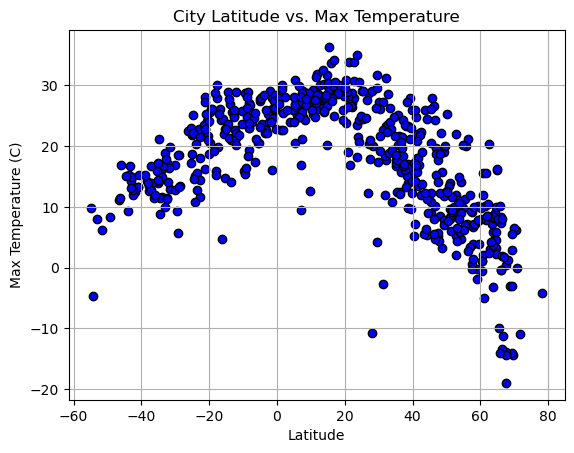

In [5]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df ["Lat"]
temp = city_data_df["Max Temp"]
plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

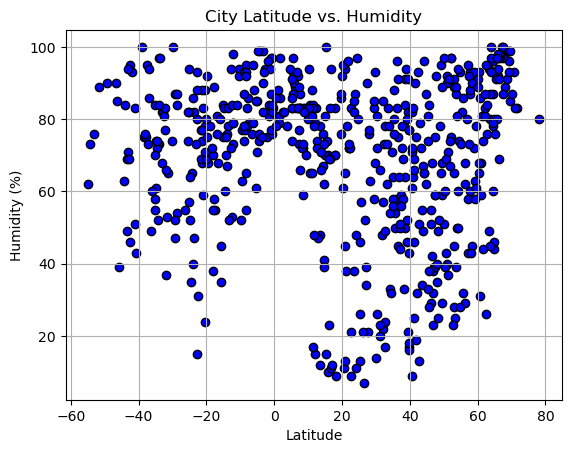

In [6]:
# Build the scatter plots for latitude vs. humidity
humid = city_data_df["Humidity"]
plt.scatter(lat, humid, marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

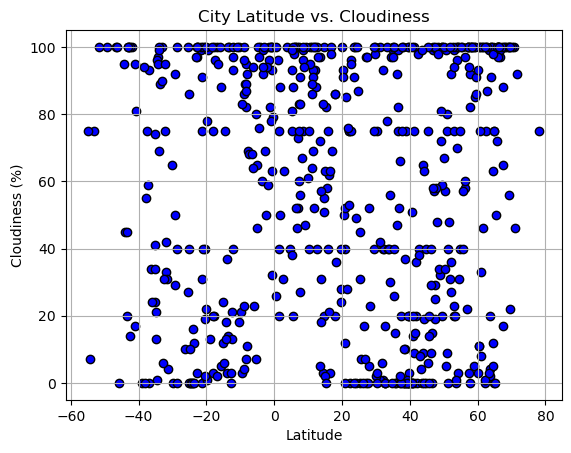

In [7]:
# Build the scatter plots for latitude vs. cloudiness
cloud = city_data_df["Cloudiness"]
plt.scatter(lat, cloud, marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

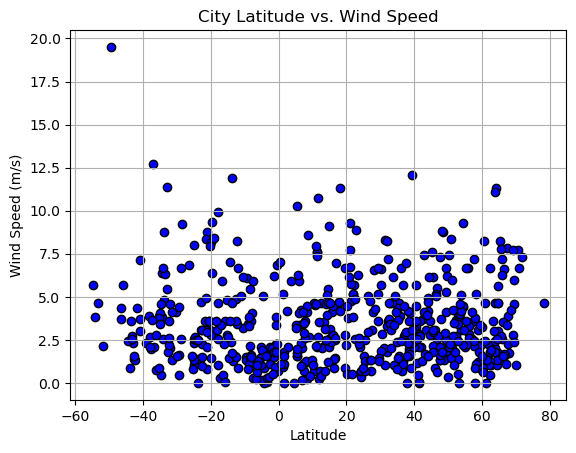

In [8]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df["Wind Speed"]
plt.scatter(lat, wind, marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [9]:
# Define a function to create Linear Regression plots

def LReg(x,y):
    LR_slope, LR_int, LR_r, LR_p, LR_std_err = linregress(x, y)
    LR_fit = LR_slope * x + LR_int
    
    line_eq = "y = " + str(round(LR_slope,2)) + "x +" + str(round(LR_int,2))
    
    plt.plot(x,LR_fit,color = "red",label='y={:.2f}x+{:.2f}'.format(LR_slope,LR_int))
    
    plt.annotate(line_eq,xy=(0.1, 0.1),xycoords='axes fraction',fontsize=15,color="red")
    print(f"The r-value is: {LR_r**2}")
    
    plt.show()

In [10]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,20.29,26,75,6.69,CA,1683802270
2,bethel,41.3712,-73.4140,22.05,46,0,0.00,US,1683797957
3,albany,42.6001,-73.9662,22.36,51,40,3.73,US,1683797903
4,stanley,54.8680,-1.6985,9.84,93,40,2.06,GB,1683864352
5,bikenibeu village,1.3673,173.1241,29.98,79,75,5.14,KI,1683829119


In [11]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,11.15,90,100,4.35,NZ,1683834787
6,adamstown,-25.0660,-130.1015,21.89,57,86,7.99,PN,1683817660
9,puerto ayora,-0.7393,-90.3518,25.86,97,93,2.24,EC,1683806117
11,howard springs,-12.4970,131.0470,22.71,53,21,4.88,AU,1683840308
12,edinburgh of the seven seas,-37.0676,-12.3116,16.78,86,93,12.73,SH,1683877093


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6498219964893281


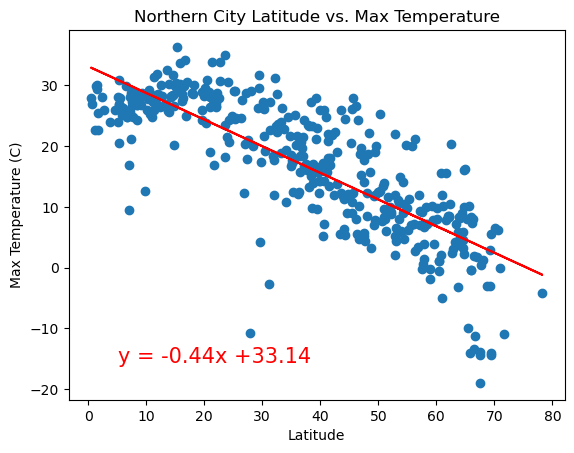

In [12]:
# Linear regression on Northern Hemisphere
lat = northern_hemi_df["Lat"]
temp = northern_hemi_df["Max Temp"]

plt.scatter(lat, temp)

plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title("Northern City Latitude vs. Max Temperature")

LReg(lat,temp)

The r-value is: 0.5626937293467514


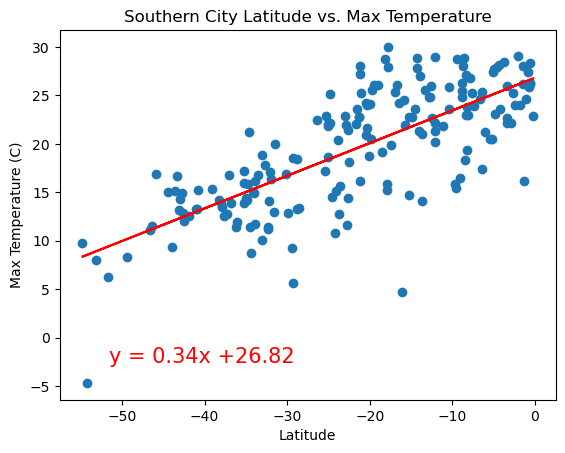

In [13]:
# Linear regression on Southern Hemisphere
lat = southern_hemi_df["Lat"]
temp = southern_hemi_df["Max Temp"]

plt.scatter(lat, temp)

plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title("Southern City Latitude vs. Max Temperature")

LReg(lat,temp)

**Discussion about the linear relationship:** The relationship between coordinates and temperature seems to be quite strong. This makes sense as climates that are closer to the equator tends to be hotter and climates further away tend to be much colder.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0035452031259838074


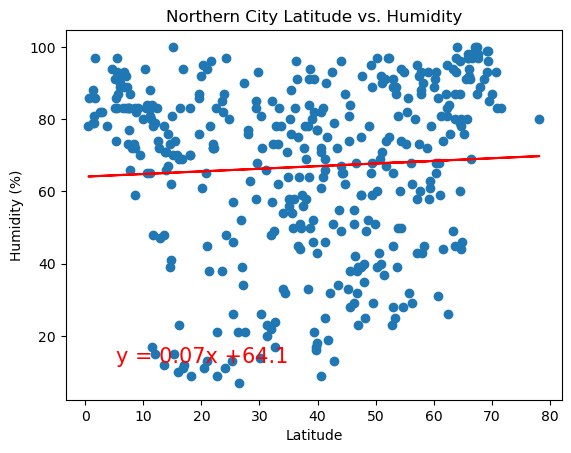

In [14]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
humid = northern_hemi_df["Humidity"]

plt.scatter(lat, humid)

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Northern City Latitude vs. Humidity")

LReg(lat,humid)


plt.show()

The r-value is: 0.045275648321876846


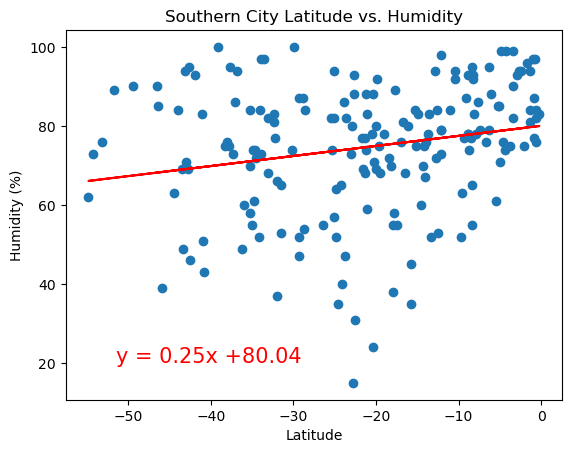

In [15]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
humid = southern_hemi_df["Humidity"]

plt.scatter(lat, humid)

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Southern City Latitude vs. Humidity")

LReg(lat,humid)


plt.show()

**Discussion about the linear relationship:** For the northern hemispehere there does not seem to be a strong correlation between humidity and latitude. However it seems that both hemispeheres tend to lean towards higher humidity percentage. The southern hemispehere especially has a large concentration of high humidity accross the board and very low counts of low humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 1.18299498991154e-05


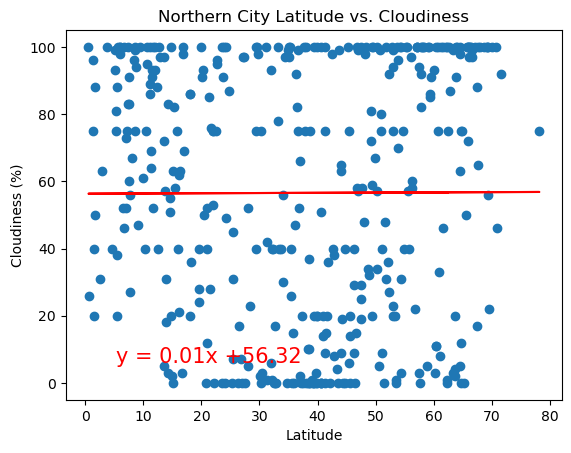

In [16]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
cloud = northern_hemi_df["Cloudiness"]

plt.scatter(lat, cloud)

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Northern City Latitude vs. Cloudiness")

LReg(lat,cloud)



plt.show()

The r-value is: 0.00908382320755767


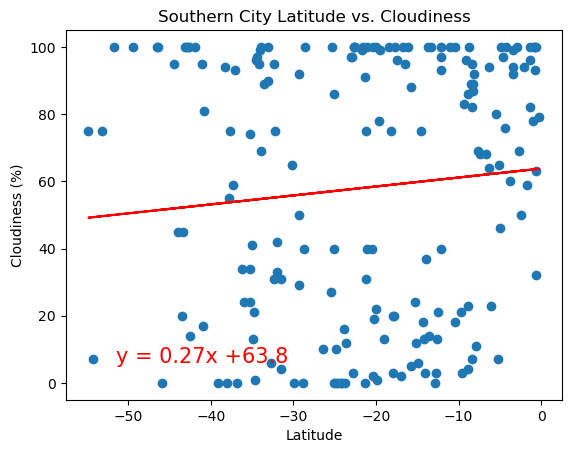

In [17]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
cloud = southern_hemi_df["Cloudiness"]

plt.scatter(lat, cloud)

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Southern City Latitude vs. Cloudiness")

LReg(lat,cloud)

plt.show()

**Discussion about the linear relationship:** There does not seem to be any correlation between cloudiness and latitude and high and low cloudiness percentages appear at most points of latitudes. Most points of latitudes also seem to have a good amount of average cloudiness percentages and not just exetremely cloudy or not cloudy at all.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00048520784861718545


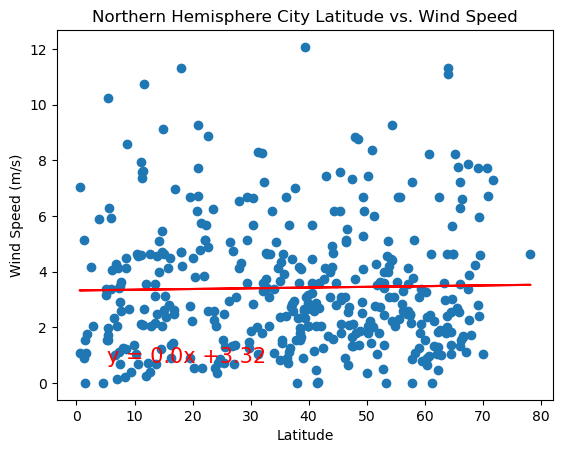

In [18]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
wind = northern_hemi_df["Wind Speed"]

plt.scatter(lat, wind)

plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed")

LReg(lat,wind)

plt.show()

The r-value is: 0.053123865200217994


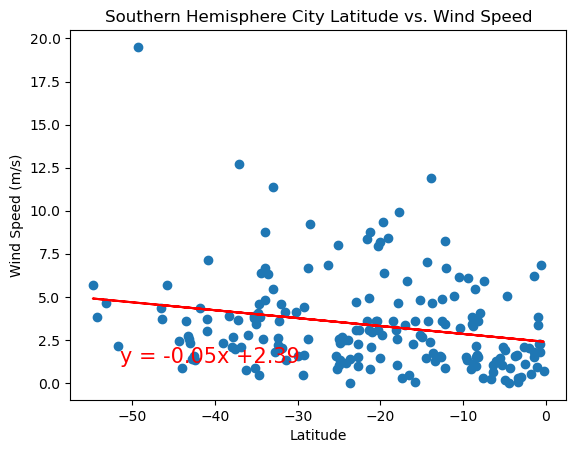

In [19]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
wind = southern_hemi_df["Wind Speed"]

plt.scatter(lat, wind)

plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed")

LReg(lat,wind)

plt.show()

**Discussion about the linear relationship:** There doesn't seem to be that much of a correlation between latitude and wind speed as low and high speeds are found at both extremes of latitude. However it seems that low wind speed seems to be the most common. The Northern hemispehere also seems to have more instances of mid-speed wind.